In [1]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import scipy.sparse as sps
from scipy import sparse
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager
font_manager.fontManager.addfont("/n02dat01/users/lchai/anaconda3/envs/Nm/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/arial.ttf")
plt.rcParams["font.sans-serif"] = "Arial" 
from matplotlib.pyplot import MultipleLocator
import statsmodels.api as sm
from nilearn import image, surface, plotting, datasets
from tqdm import tqdm
from sklearn.model_selection import KFold
from sklearn.cross_decomposition import PLSCanonical, PLSRegression, CCA
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings('ignore')

/n01dat01/dyli/soft/miniconda3/envs/pynb/lib/python3.8/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
_ = np.array([0, 2, 12, 14, 16, 18, 20, 22, 24, 26, 29, 31, 33, 35, 37, 39, 41, 43, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 4, 5, 6, 7, 8, 9, 10, 11, 28, 45])
# read the fiber name
l_idx = [1,3,13,15,17,19,25,27,30,32,36,38,40,42,44,47,49,51,53,55,57,59,61,63,65,67,69,71]
r_idx = [2,4,14,16,18,24,26,28,31,35,37,39,41,43,45,48,50,52,54,56,58,60,62,64,66,68,70,72]
m_idx = [4,5,6,7,8,9,10,11]
l_idx = np.array(l_idx)
r_idx = np.array(r_idx)
m_idx = np.array(m_idx)
l_idx = l_idx-1
r_idx = r_idx-1
label_f = open('/n02dat01/users/dyli/Grad_data/support_data/fiber_name_ori_nonum_nohemi.txt', 'r')
label_name = label_f.readlines()
label_name = [' '.join([i.strip() for i in price.strip().split('\n')]) for price in label_name]
label_name_lm = [label_name[l_idx[i]] for i in range(len(l_idx))] + [label_name[m_idx[i]] for i in range(len(m_idx))]
print(f'the number of fiber: {len(label_name_lm)}')

new_fiber_idx = []
for fi,ff in enumerate(_):
    if ff in list(l_idx)+list(m_idx): new_fiber_idx.append(fi)
new_fiber_idx = np.array(new_fiber_idx)
print(new_fiber_idx.shape)

the number of fiber: 36
(36,)


In [3]:
# the medial wall
dirc_L = '/n02dat01/users/dyli/Atlas/metric_index_L.txt'
select_ind_L = np.loadtxt( dirc_L ).astype(int)
dirc_R = '/n02dat01/users/dyli/Atlas/metric_index_R.txt'
select_ind_R = np.loadtxt( dirc_R ).astype(int)

In [4]:
TaskList = ['EMOTION-cope1','EMOTION-cope2','EMOTION-cope3',
            'GAMBLING-cope1','GAMBLING-cope2','GAMBLING-cope3',
            'LANGUAGE-cope1','LANGUAGE-cope2','LANGUAGE-cope4',
            'MOTOR-cope1','MOTOR-cope2','MOTOR-cope3','MOTOR-cope4','MOTOR-cope5','MOTOR-cope6','MOTOR-cope7','MOTOR-cope8','MOTOR-cope9','MOTOR-cope10','MOTOR-cope11','MOTOR-cope12','MOTOR-cope13',
            'RELATIONAL-cope1','RELATIONAL-cope2','RELATIONAL-cope4',
            'SOCIAL-cope1','SOCIAL-cope2','SOCIAL-cope6',
            'WM-cope1','WM-cope2','WM-cope3','WM-cope4','WM-cope5','WM-cope6','WM-cope7','WM-cope8','WM-cope9',
            'WM-cope10','WM-cope11','WM-cope15','WM-cope16','WM-cope17','WM-cope18','WM-cope19','WM-cope20','WM-cope21','WM-cope22',
            ]

In [5]:
TaskName = ['EMOTION-FACES','EMOTION-SHAPES','EMOTION-FACES-SHAPES',
            'GAMBLING-PUNISH','GAMBLING-REWARD','GAMBLING-PUNISH-REWARD',
            'LANGUAGE-MATH','LANGUAGE-STORY','LANGUAGE-STORY-MATH',
            'MOTOR-CUE','MOTOR-LF','MOTOR-LH','MOTOR-RF','MOTOR-RH','MOTOR-T','MOTOR-AVG','MOTOR-CUE-AVG','MOTOR-LF-AVG','MOTOR-LH-AVG','MOTOR-RF-AVG','MOTOR-RH-AVG','MOTOR-T-AVG',
            'RELATIONAL-MATCH','RELATIONAL-REL','RELATIONAL-REL-MATCH',
            'SOCIAL-RANDOM','SOCIAL-TOM','SOCIAL-TOM-RANDOM',
            'WM-2BK_BODY','WM-2BK_FACE','WM-2BK_PLACE','WM-2BK_TOOL','WM-0BK_BODY','WM-0BK_FACE','WM-0BK_PLACE','WM-0BK_TOOL','WM-2BK',
            'WM-0BK','WM-2BK-0BK','WM-BODY','WM-FACE','WM-PLACE','WM-TOOL','WM-BODY-AVG','WM-FACE-AVG','WM-PLACE-AVE','WM-TOOL-AVE',
            ]

In [6]:
namelist = [
 '100307', '100408', '101107', '101309', '101915', '103111', '103414', '103818', '105014', '105115', 
 '106016', '108828', '110411', '111312', '111716', '113619', '113922', '114419', '115320', '116524', 
 '117122', '118528', '118730', '118932', '120111', '122317', '122620', '123117', '123925', '124422', 
 '125525', '126325', '127630', '127933', '128127', '128632', '129028', '130013', '130316', '131217', 
 '131722', '133019', '133928', '135225', '135932', '136833', '138534', '139637', '140925', '144832', 
 '146432', '147737', '148335', '148840', '149337', '149539', '149741', '151223', '151526', '151627', 
 '153025', '154734', '156637', '159340', '160123', '161731', '162733', '163129', '176542', '178950', 
 '188347', '189450', '190031', '192540', '196750', '198451', '199655', '201111', '208226', '211417', 
 '211720', '212318', '214423', '221319', '239944', '245333', '280739', '298051', '366446', '397760', 
 '414229', '499566', '654754', '672756', '751348', '756055', '792564', '856766', '857263', '899885', 
 ]

In [7]:
def GAMMA_my(data):
    from sklearn.mixture import GaussianMixture
    from scipy.stats import gamma

    # 使用 GaussianMixture 拟合数据
    gmm = GaussianMixture(n_components=2)  # 一个高斯分布和一个Gamma分布
    gmm.fit(data.reshape(-1, 1))

    # 获取每个分布的均值和方差
    means = gmm.means_.flatten()
    variances = gmm.covariances_.flatten()
    print(means, variances)

    # 正激活阈值和负激活阈值分别设定为两个Gamma分布的中位数
    gamma1_mean = means[variances.argmax()]

    # 对于Gamma分布，中位数等于shape参数乘以尺度参数的自然对数
    gamma_threshold = gamma.ppf(0.5, a=2, scale=gamma1_mean/2)

    return gamma_threshold

def PeakThr_my(FPM_noMedialWall, thr):
    from scipy.stats import gaussian_kde

    # 找到概率密度分布的峰值，选择峰值右侧 5% 区间的端点作为阈值，借此去掉值较小的脑区
    density = gaussian_kde(FPM_noMedialWall)
    x_vals = np.linspace(min(FPM_noMedialWall), max(FPM_noMedialWall), num=2000)
    density_vals = density(x_vals)
    peak_idx = np.argmax(density_vals)
    q = lambda x : x if x > x_vals[peak_idx+int(2000*thr/100)] else 0
    FPM_noMedialWall_thr = np.array([q(FPM_noMedialWall[i]) for i in range(FPM_noMedialWall.shape[0])])

    return FPM_noMedialWall_thr

def normalization_my(x:np.ndarray):
    # x: (29696,)
    x_pos = x.copy()
    x_pos[x<0] = 0
    x_pos = x_pos / np.max(x_pos)

    x_neg = x.copy()
    x_neg[x>0] = 0
    x_neg = -1 *x_neg / np.min(x_neg)

    return x_neg + x_pos

Calculate the expression map for each AM

In [ ]:
# for the example task
tasknamei = TaskName.index('WM-2BK')
tasknamei

# 2024.4.4 Final results

### Firstly, we found that FGE is correlationed with task activation map

In [8]:
# task_name = 'MOTOR-T'
task_name = 'LANGUAGE-STORY-MATH'

* the Pearsonr for correlation relationship between FGE and task activation map along subjects

In [74]:
# AM_GAMMA = np.loadtxt(f'/n01dat01/dyli/multi/results_data/AM_prediction_expression/y_{TaskList[TaskName.index(task_name)]}_thrGAMMA.txt')
AM_GAMMA = np.loadtxt(f'/n01dat01/dyli/multi/results_data/AM_prediction_expression/{TaskList[TaskName.index(task_name)]}_100sub_thrGAMMA_59412.txt')[:, 0:29696]
print(AM_GAMMA.shape)
AM_GAMMA_mean = np.mean(AM_GAMMA, axis=0)
# print(len(np.argwhere(AM_GAMMA_mean<0.1)))

task_expression_ori = np.loadtxt(f'/n01dat01/dyli/multi/results_data/AM_prediction_correlation/correlation_{TaskList[TaskName.index(task_name)]}.txt')
task_expression_p = np.loadtxt(f'/n01dat01/dyli/multi/results_data/AM_prediction_correlation/correlationP_{TaskList[TaskName.index(task_name)]}.txt')
task_expression = task_expression_ori.copy()
task_expression[task_expression_p>0.05] =0
# task_expression[task_expression_p<=0.05] =1
print(task_expression.shape)

task_expression_ori = np.array([task_expression_ori[i,:].reshape(199,36) for i in range(29696)])
task_expression_p_ = np.array([task_expression_p[i,:].reshape(199,36) for i in range(29696)])
print(task_expression_ori.shape)

for fiber in tqdm(range(36)):
    if fiber==0:
        task_expression_newrank1 = task_expression_ori[...,fiber]
        task_expression_p_newrank1 = task_expression_p_[...,fiber]
    else:
        task_expression_newrank1 = np.concatenate((task_expression_newrank1, task_expression_ori[...,fiber]), axis=1)
        task_expression_p_newrank1 = np.concatenate((task_expression_p_newrank1, task_expression_p_[...,fiber]), axis=1)
print(task_expression_newrank1.shape, task_expression_p_newrank1.shape)

task_expression_newrank1_ac = []
task_expression_p_newrank1_ac = []

for _ in tqdm(range(29696)):
    # if AM_GAMMA_mean[_] > 0.1 or AM_GAMMA_mean[_]<-0.1:
    if AM_GAMMA_mean[_] !=0:
        task_expression_newrank1_ac.append(task_expression_newrank1[_,:])
        task_expression_p_newrank1_ac.append(task_expression_p_newrank1[_,:])

task_expression_newrank1_ac = np.array(task_expression_newrank1_ac)
task_expression_p_newrank1_ac = np.array(task_expression_p_newrank1_ac)
print(task_expression_newrank1_ac.shape, task_expression_p_newrank1_ac.shape)

# FDR
temp = task_expression_p_newrank1_ac.flatten()
p_rank = np.argsort(temp)[::-1]
print(temp[p_rank[0]])

q = np.array([temp[i] * (temp.shape[0]/p_rank[i]) for i in range(temp.shape[0])])
q = q.reshape(task_expression_p_newrank1_ac.shape[0], task_expression_p_newrank1_ac.shape[1])
print(q.shape, np.min(q), len(np.argwhere(q<=0.05)))

task_expression_newrank1_ac_FDR05 = task_expression_newrank1_ac.copy()
task_expression_newrank1_ac_FDR05[q>0.05] =0

# r = np.zeros(199*36)
# for i in tqdm(range(199*36)):
#     r[i],p = pearsonr(task_expression_newrank1_ac[:,i], np.squeeze(AM_GAMMA_mean[AM_GAMMA_mean!=0]))
# np.save(f'/n01dat01/dyli/multi/results_data/AM_prediction_correlation/corr4corr/{task_name}_new.npy', r)

(100, 29696)
(29696, 7164)
(29696, 199, 36)


100%|██████████| 36/36 [00:34<00:00,  1.04it/s]


(29696, 7164) (29696, 7164)


100%|██████████| 29696/29696 [00:00<00:00, 1280340.16it/s]


(6362, 7164) (6362, 7164)
0.9999999939605303
(6362, 7164) 4.971221312979872e-08 1171844


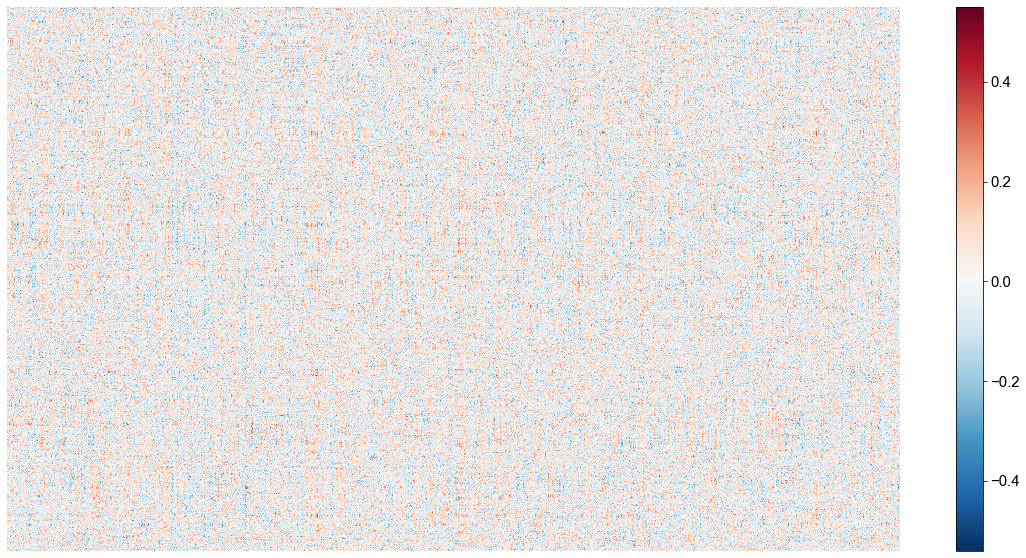

In [80]:
# plotting
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
df = pd.DataFrame(task_expression_newrank1)
fig = sns.heatmap(df, cmap='RdBu_r', cbar=False)
ax.tick_params(labelsize=15)
cb = fig.figure.colorbar(fig.collections[0]) #显示colorbar
cb.ax.tick_params(labelsize=15) #设置colorbar刻度字体大小
plt.xticks([],rotation=90)
plt.yticks([],rotation=90)
fig = fig.get_figure()
plt.show()

In [41]:
r = np.zeros(199*36)
p = np.zeros(199*36)
for i in tqdm(range(199*36)):
    r[i],p[i] = pearsonr(task_expression_newrank1_ac[:,i], np.squeeze(AM_GAMMA_mean[AM_GAMMA_mean!=0]))
# np.save(f'/n01dat01/dyli/multi/results_data/AM_prediction_correlation/corr4corr/{task_name}_new.npy', r)


100%|██████████| 7164/7164 [00:03<00:00, 1917.03it/s]


In [75]:
AM = np.loadtxt(f'/n01dat01/dyli/multi/results_data/AM_prediction_expression/y_{TaskList[TaskName.index(task_name)]}_thrGAMMA.txt')
AM_mean = np.mean(AM, axis=0)
r = np.zeros(199*36)
p = np.zeros(199*36)
for i in tqdm(range(199*36)):
    r[i],p[i] = pearsonr(task_expression_newrank1[:,i], np.squeeze(AM_mean))

100%|██████████| 7164/7164 [00:11<00:00, 644.88it/s]


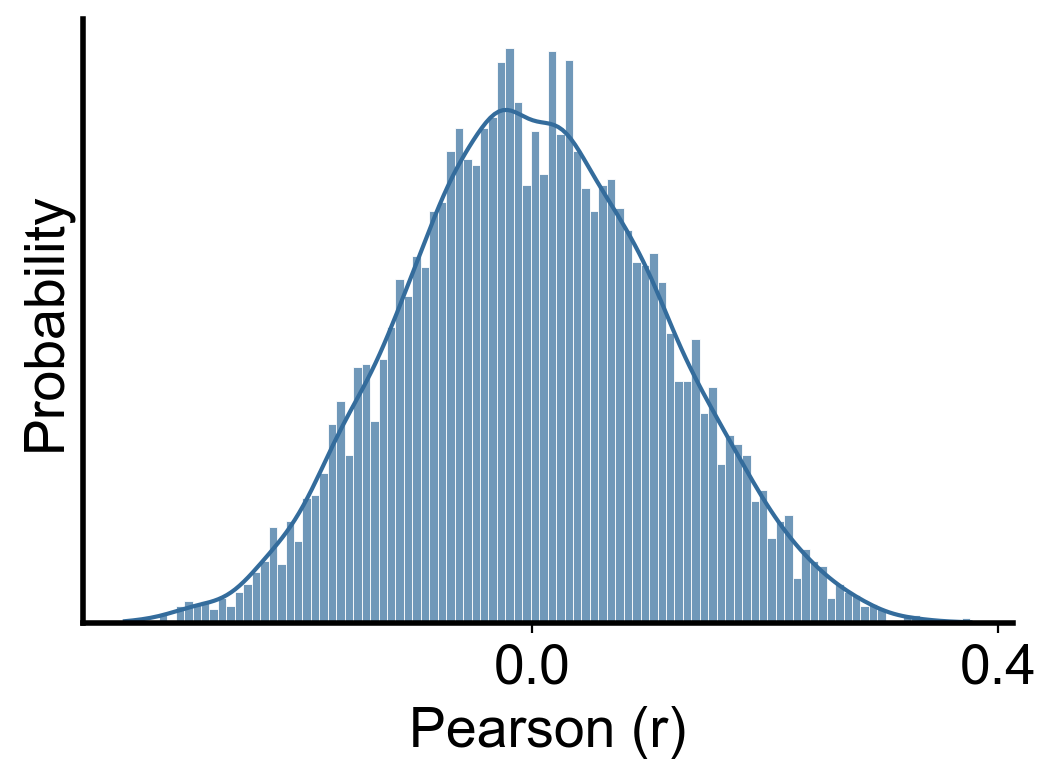

In [76]:
import seaborn as sns
from matplotlib import font_manager
font_manager.fontManager.addfont("/n02dat01/users/lchai/anaconda3/envs/Nm/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/arial.ttf")
plt.rcParams["font.sans-serif"] = "Arial" 

df = pd.DataFrame(r, columns = ['r'])
plt.figure(figsize=(6, 4), dpi=200)
sns.histplot(data=df, 
            x='r', 
            bins=100, 
            kde=True,
            color='#346c9c', # '#FFD3D4', 
            alpha=0.7, 
            edgecolor="white")
sns.despine(top=True, right=True)
plt.yticks([])
plt.xticks(fontsize=20)
plt.ylabel('Probability', fontsize=20)
plt.xlabel('Pearson (r)', fontsize=20)
ax=plt.gca()
x_major_locator=MultipleLocator(0.4)
ax.xaxis.set_major_locator(x_major_locator)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
plt.show()

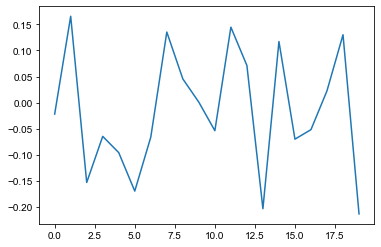

In [77]:
_r = r.reshape(199,36)
MLF_r = _r[:,label_name_lm.index('AF')]
plt.plot(MLF_r[0:20])
plt.show()

In [78]:
r_rank_index = np.argsort(r)[::-1]
for i in r_rank_index:
    print(i,np.round(r[i],3),p[i], label_name_lm[i//199], i%199)

1953 0.376 0.0 POPT 162
5736 0.37 0.0 CA 164
6398 0.349 0.0 CC_4 30
494 0.339 0.0 CG 96
874 0.332 0.0 MLF 78
4199 0.331 0.0 ST_FO 20
7124 0.326 0.0 CC_7 159
1119 0.324 0.0 FPT 124
5818 0.322 0.0 CC_1 47
3624 0.321 0.0 T_POSTC 42
905 0.317 0.0 MLF 109
6386 0.306 0.0 CC_4 18
6925 0.3 0.0 CC_6 159
2790 0.3 0.0 UF 4
2859 0.3 0.0 UF 73
2367 0.3 0.0 SLF_II 178
2517 0.298 0.0 SLF_III 129
5076 0.296 0.0 ST_POSTC 101
485 0.295 0.0 CG 87
4950 0.293 0.0 ST_PREC 174
249 0.29 0.0 ATR 50
1728 0.29 0.0 OR 136
1380 0.29 0.0 IFO 186
2328 0.29 0.0 SLF_II 139
2427 0.289 0.0 SLF_III 39
1451 0.287 0.0 ILF 58
911 0.285 0.0 MLF 115
3015 0.284 0.0 T_PREF 30
497 0.283 0.0 CG 99
5703 0.283 0.0 CA 131
6440 0.28 0.0 CC_4 72
4921 0.279 0.0 ST_PREC 145
3035 0.279 0.0 T_PREF 50
5357 0.277 0.0 ST_PAR 183
2369 0.277 0.0 SLF_II 180
5982 0.276 0.0 CC_2 12
1418 0.276 0.0 ILF 25
5050 0.276 0.0 ST_POSTC 75
1089 0.275 0.0 FPT 94
4116 0.275 0.0 T_OCC 136
2432 0.274 0.0 SLF_III 44
5773 0.274 0.0 CC_1 2
1462 0.273 0.0 ILF 69
5

In [96]:
# MLF_r_rank_index = np.argsort(MLF_r)[::-1]
# print('pos')
# for i in MLF_r_rank_index[0:10]:
#     print(i,np.round(MLF_r[i],3))
# print('neg')
# for i in MLF_r_rank_index[-10:]:
#     print(i,np.round(MLF_r[i],3))

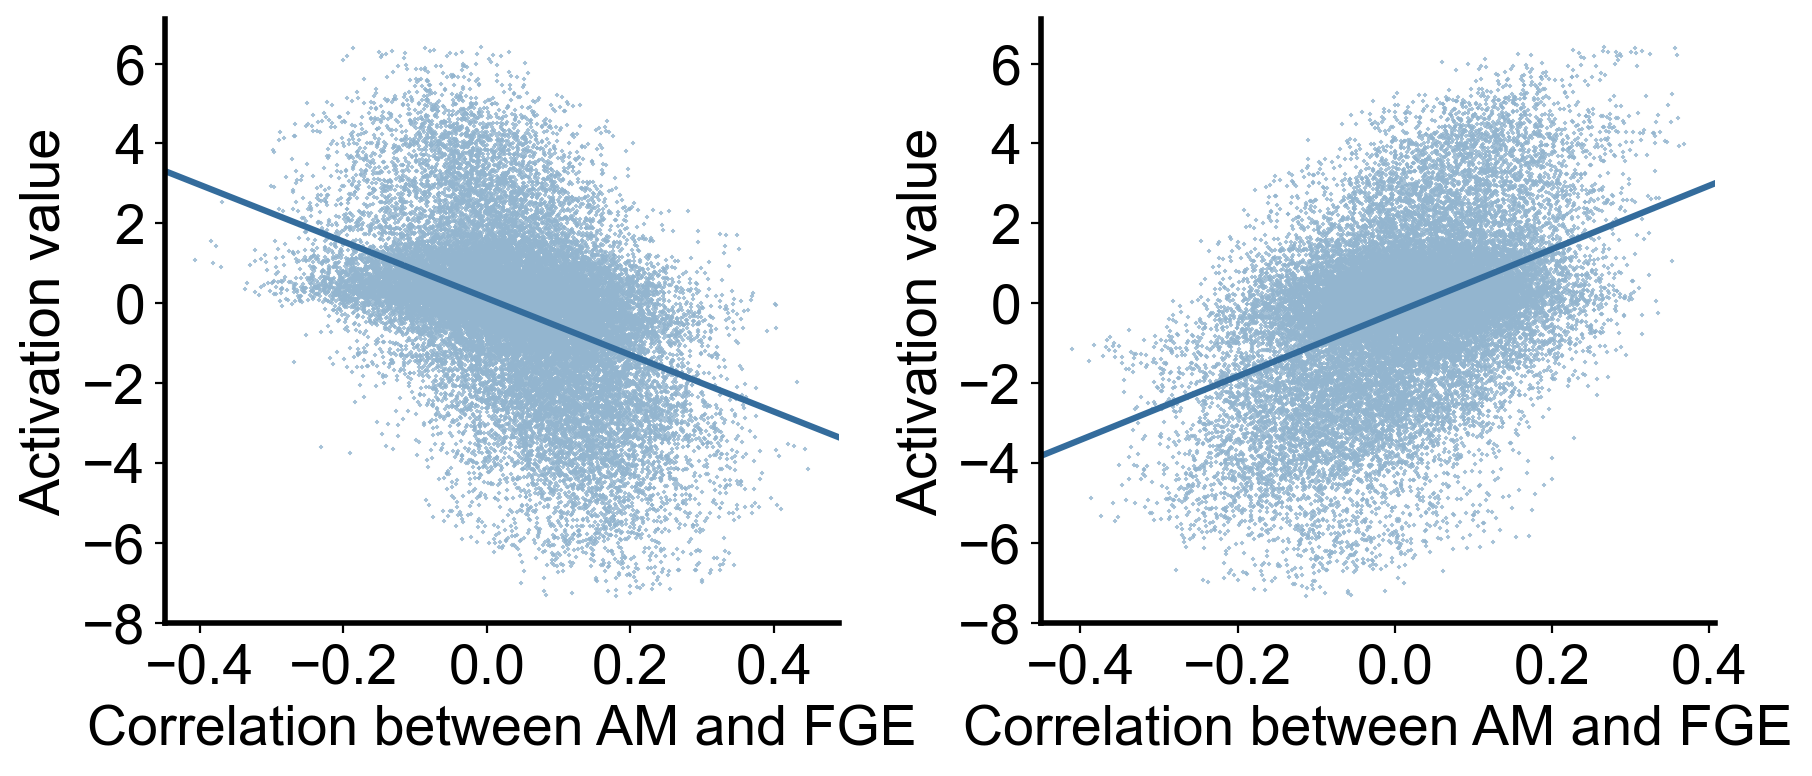

In [64]:
fig = plt.figure(figsize=(10, 4), dpi=200)
fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.3)

ax = fig.add_subplot(121)
df = pd.DataFrame(np.concatenate((task_expression_newrank1[:,9][:, np.newaxis], AM_mean[:, np.newaxis]), axis=1), 
                  columns=['task correlation', 'AM'])
ax = sns.regplot(y="AM", x="task correlation", \
                data=df, \
                ci=None, \
                robust=True, \
                scatter_kws={'s':1, 'color':'#93b5cf'}, \
                line_kws={'linestyle':'solid', 'color':'#346c9c'}, \
                marker='+', truncate=False,
                # color='blue'
                )
ax=plt.gca()
x_major_locator=MultipleLocator(0.2)
ax.xaxis.set_major_locator(x_major_locator)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Activation value',fontsize=20)
plt.xlabel('Correlation between AM and FGE',fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')

ax = fig.add_subplot(122)
df = pd.DataFrame(np.concatenate((task_expression_newrank1[:,32][:, np.newaxis], AM_mean[:, np.newaxis]), axis=1), 
                  columns=['task correlation', 'AM'])
ax = sns.regplot(y="AM", x="task correlation", \
                data=df, \
                ci=None, \
                robust=True, \
                scatter_kws={'s':1, 'color':'#93b5cf'}, \
                line_kws={'linestyle':'solid', 'color':'#346c9c'}, \
                marker='+', truncate=False,
                # color='blue'
                )# e0e0dd
ax=plt.gca()
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Activation value',fontsize=20)
plt.xlabel('Correlation between AM and FGE',fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')

plt.show()

* binary results

In [87]:
for task_name in TaskName:
    print(task_name)

    task_expression_newrank1_FDR05 = np.loadtxt(f'/n01dat01/dyli/multi/results_data/AM_prediction_correlation/FDR05_results/{task_name}_FDR05.txt')
    task_expression_newrank1_FDR05_bin = task_expression_newrank1_FDR05.copy()
    task_expression_newrank1_FDR05_bin[task_expression_newrank1_FDR05!=0] =1
    task_expression_newrank1_FDR05_bin_sum = np.mean(task_expression_newrank1_FDR05_bin, axis=0).reshape(199, 36)
    print(task_expression_newrank1_FDR05_bin_sum.shape)
    np.save(f'/n01dat01/dyli/multi/results_data/AM_prediction_correlation/FDR05_results/CountNumResults/{task_name}_AllVertex', task_expression_newrank1_FDR05_bin_sum)

    task_expression_newrank1_ac_FDR05_bin = task_expression_newrank1_ac_FDR05.copy()
    task_expression_newrank1_ac_FDR05_bin[task_expression_newrank1_ac_FDR05!=0] =1
    task_expression_newrank1_ac_FDR05_bin_sum = np.mean(task_expression_newrank1_ac_FDR05_bin, axis=0).reshape(199, 36) * 100
    print(task_expression_newrank1_ac_FDR05_bin_sum.shape)
    np.save(f'/n01dat01/dyli/multi/results_data/AM_prediction_correlation/FDR05_results/CountNumResults/{task_name}_ac', task_expression_newrank1_ac_FDR05_bin_sum)

EMOTION-FACES
(199, 36)
(199, 36)
EMOTION-SHAPES
(199, 36)
(199, 36)
EMOTION-FACES-SHAPES
(199, 36)
(199, 36)
GAMBLING-PUNISH
(199, 36)
(199, 36)
GAMBLING-REWARD
(199, 36)
(199, 36)
GAMBLING-PUNISH-REWARD
(199, 36)
(199, 36)
LANGUAGE-MATH
(199, 36)
(199, 36)
LANGUAGE-STORY
(199, 36)
(199, 36)
LANGUAGE-STORY-MATH
(199, 36)
(199, 36)
MOTOR-CUE
(199, 36)
(199, 36)
MOTOR-LF
(199, 36)
(199, 36)
MOTOR-LH
(199, 36)
(199, 36)
MOTOR-RF
(199, 36)
(199, 36)
MOTOR-RH
(199, 36)
(199, 36)
MOTOR-T
(199, 36)
(199, 36)
MOTOR-AVG
(199, 36)
(199, 36)
MOTOR-CUE-AVG
(199, 36)
(199, 36)
MOTOR-LF-AVG
(199, 36)
(199, 36)
MOTOR-LH-AVG
(199, 36)
(199, 36)
MOTOR-RF-AVG
(199, 36)
(199, 36)
MOTOR-RH-AVG
(199, 36)
(199, 36)
MOTOR-T-AVG
(199, 36)
(199, 36)
RELATIONAL-MATCH
(199, 36)
(199, 36)
RELATIONAL-REL
(199, 36)
(199, 36)
RELATIONAL-REL-MATCH
(199, 36)
(199, 36)
SOCIAL-RANDOM
(199, 36)
(199, 36)
SOCIAL-TOM
(199, 36)
(199, 36)
SOCIAL-TOM-RANDOM
(199, 36)
(199, 36)
WM-2BK_BODY
(199, 36)
(199, 36)
WM-2BK_FACE
(199

In [84]:
pearsonr(temp[:,0], task_expression_newrank1_FDR05[:,0])

(0.08274716101751467, 2.7801049180617794e-46)

(47, 7164)


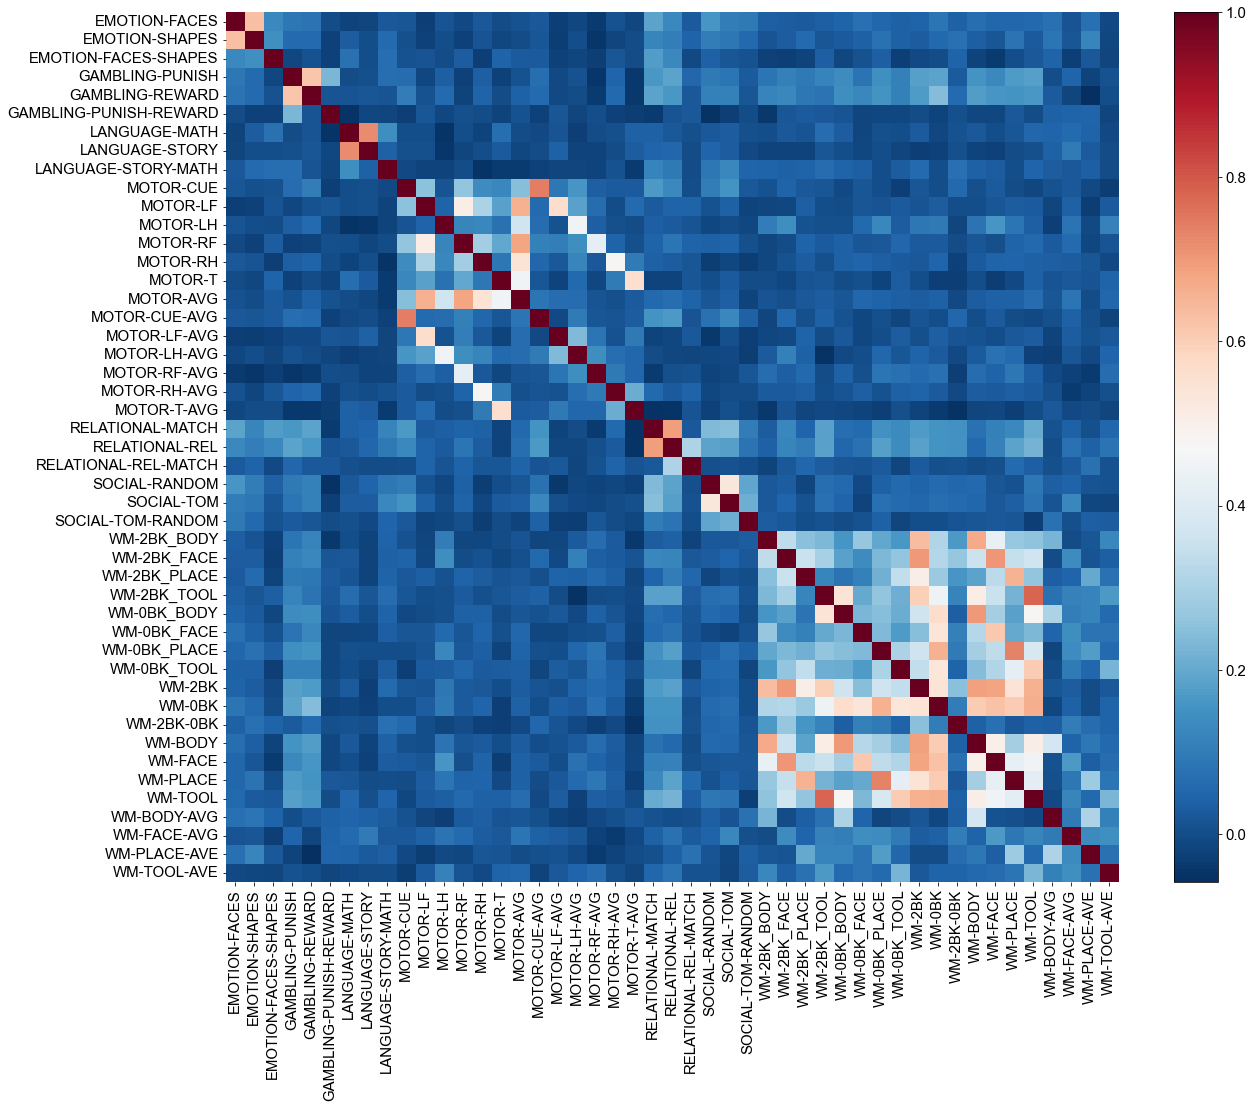

In [94]:
AllTaskCorr = []
for task_name in TaskName:
    AllTaskCorr.append(np.load(f'/n01dat01/dyli/multi/results_data/AM_prediction_correlation/FDR05_results/CountNumResults/{task_name}_AllVertex.npy').flatten())
AllTaskCorr = np.array(AllTaskCorr)
print(AllTaskCorr.shape)

SimilarityBetweenDiffTask = np.zeros((47,47))
for i in range(47):
    for k in range(47):
        SimilarityBetweenDiffTask[i,k], p = pearsonr(AllTaskCorr[i,:], AllTaskCorr[k,:])

# plotting
fig = plt.figure(figsize=(20,16))
ax = fig.add_subplot(111)
df = pd.DataFrame(SimilarityBetweenDiffTask, columns=TaskName, index=TaskName)
fig = sns.heatmap(df, cmap='RdBu_r', cbar=False)
ax.tick_params(labelsize=15)
cb = fig.figure.colorbar(fig.collections[0]) #显示colorbar
cb.ax.tick_params(labelsize=15) #设置colorbar刻度字体大小
plt.xticks(rotation=90)
plt.yticks(rotation=0)
fig = fig.get_figure()
plt.show()

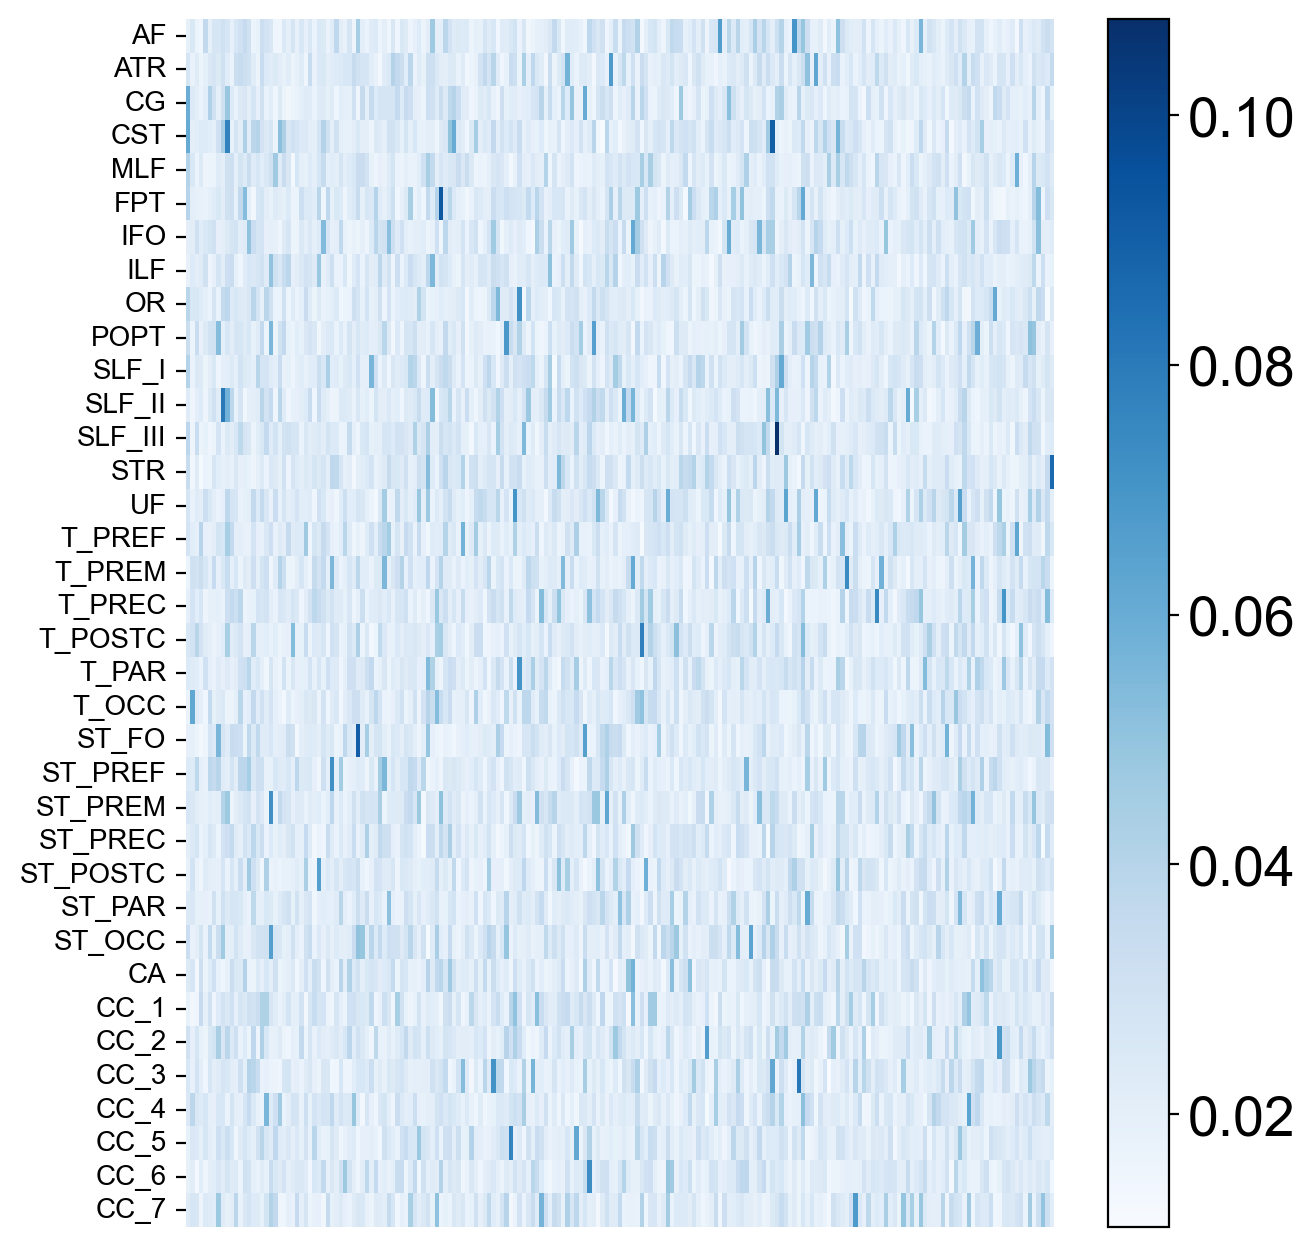

In [79]:
# task_expression_newrank1_ac_FDR05_bin_sum = np.load(f'/n01dat01/dyli/multi/results_data/AM_prediction_correlation/FDR05_results/CountNumResults/{task_name}_AllVertex.npy')
# plotting
fig = plt.figure(figsize=(7,8), dpi=200)
ax = fig.add_subplot(111)
df = pd.DataFrame(task_expression_newrank1_FDR05_bin_sum.T, index=label_name_lm, columns=[f'mode{i}' for i in range(199)])
fig = sns.heatmap(df, 
                  cmap='Blues', 
                  # center=0,
                  cbar=False)
ax.tick_params(labelsize=10)
cb = fig.figure.colorbar(fig.collections[0]) #显示colorbar
cb.ax.tick_params(labelsize=20) #设置colorbar刻度字体大小
plt.xticks([],rotation=90)
plt.yticks(rotation=0)
fig = fig.get_figure()
plt.show()